# Classification and Prediction in GenePattern Notebook

This notebook will show you how to use k-Nearest Neighbors (kNN) to build a predictor and assess its accuracy in cross-validation.

### K-nearest-neighbors (KNN)
KNN classifies an unknown sample by assigning it the phenotype label most frequently represented among the k nearest known samples (Golub and Slonim et al., 1999). 

Additionally, you can select a weighting factor for the 'votes' of the nearest neighbors. For example, one might weight the votes by the reciprocal of the distance between neighbors to give closer neighors a greater vote.

<h2>1. Log in to GenePattern</h2>

<ul>
	<li>Select Broad Institute as the server</li>
	<li>Enter your username and password.</li>
	<li>Click <em>Login to GenePattern</em>.</li>
	<li>When you are logged in, you can click the - button in the upper right hand corner to collapse the cell.</li>
	<li>Alternatively, if you are prompted to Login as your username, just click that button and give it a couple seconds to authenticate.</li>
</ul>


In [15]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.GPAuthWidget(genepattern.register_session("https://genepattern.broadinstitute.org/gp", "", ""))


<div class="alert alert-info">
<h3>Instructions</h3>
<li>For the <strong><em>input.file</em></strong> parameter, click and drag <a href="counts_for_deseq2_genes.gct" target="_blank">counts_for_deseq2_genes.gct</a> into the <em>&quot;Enter Path or URL&quot; </em>text box</li>         <li>For the <strong><em>cls.file</em></strong> parameter, click and drag <a href="FTO_vs_NT.cls"target="_blank">FTO_vs_NT.cls</a> into the <em>&quot;Enter Path or URL&quot; </em>text box</li> <li>Click *Run*.</li>
</ol>
</p>
</div>

In [18]:
preprocessreadcounts_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00355')
preprocessreadcounts_job_spec = preprocessreadcounts_task.make_job_spec()
preprocessreadcounts_job_spec.set_parameter("input.file", "")
preprocessreadcounts_job_spec.set_parameter("cls.file", "")
preprocessreadcounts_job_spec.set_parameter("output.file", "<input.file_basename>.preprocessed.gct")
preprocessreadcounts_job_spec.set_parameter("expression.value.filter.threshold", "1")
genepattern.GPTaskWidget(preprocessreadcounts_task)

## 3. Run k-Nearest Neighbors Cross Validation
In the result cell for the PreprocessReadCounts job, you will see 2 files. 
<div class="alert alert-info">Click the "i" icon next to the MergedHTSeqCounts_GSE52778.preprocessed.gct file.</div>
You will see a dialog box with several options.

<div class="alert alert-info">
- Select "Send to existing GenePattern Cell"
- Choose "KNNXvalidation"
- Click Run.

In [16]:
knnxvalidation_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00013')
knnxvalidation_job_spec = knnxvalidation_task.make_job_spec()
knnxvalidation_job_spec.set_parameter("data.filename", "")
knnxvalidation_job_spec.set_parameter("class.filename", "")
knnxvalidation_job_spec.set_parameter("num.features", "10")
knnxvalidation_job_spec.set_parameter("feature.selection.statistic", "0")
knnxvalidation_job_spec.set_parameter("min.std", "")
knnxvalidation_job_spec.set_parameter("num.neighbors", "1")
knnxvalidation_job_spec.set_parameter("weighting.type", "1")
knnxvalidation_job_spec.set_parameter("distance.measure", "1")
knnxvalidation_job_spec.set_parameter("pred.results.file", "<data.filename_basename>.pred.odf")
knnxvalidation_job_spec.set_parameter("feature.summary.file", "<data.filename_basename>.feat.odf")
genepattern.GPTaskWidget(knnxvalidation_task)

## 4. View prediction results

### a. Read the results into a dataframe


<div class="alert alert-info">
1. Select the cell containing the job result by clicking anywhere in it.
2. Click on the i icon next to the result file that is in odf format
3. Select "Send to DataFrame"
4. You will see a new cell that contains 3 lines of code starting with `from gp.data import ODF`
5. Execute this cell
6. You will see the prediction results as a table.

### b. View prediction results as a bar chart

- Execute the following cell. 

You will see a bar graph of class predictions.
- Direction of bars indicate which class was predicted
- Length of bars indicates confidence level
- Blue = true prediction
- Red = false prediction

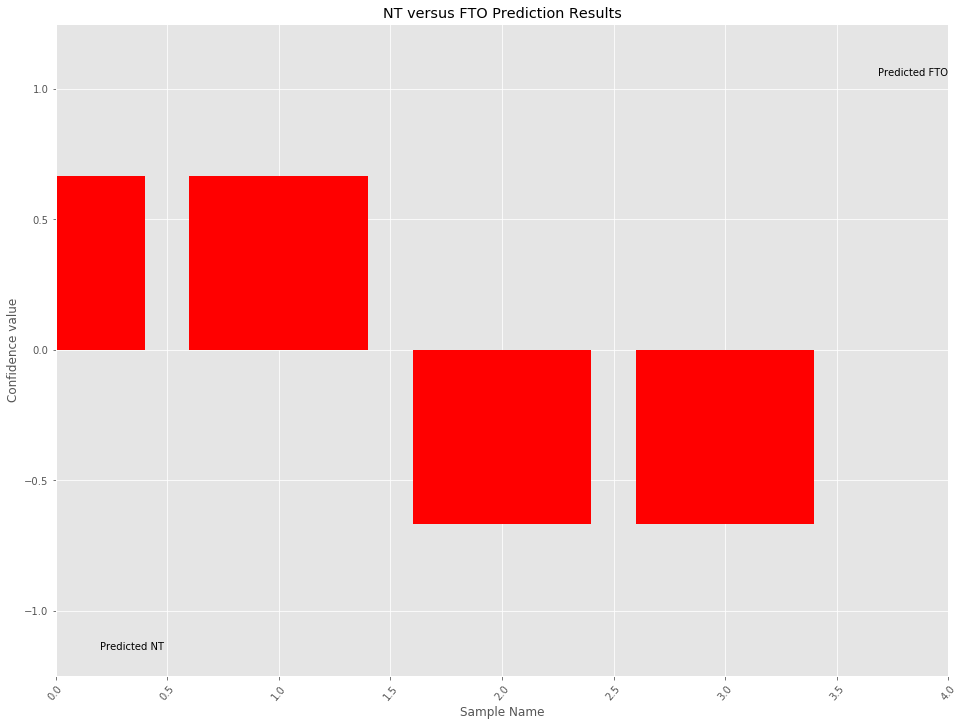

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# _ is a reference to the result of the last executed cell
df = _

result_bars = list()
bar_colors = list()
tick_labels = list()
data_rows = df.row_count()

class_labels = list((set(df.dataframe["True Class"])))

confidence = pd.to_numeric(df.dataframe["Confidence"])

for i in range(0, data_rows):
    tick_labels.append(df.dataframe["Samples"][i])
    if df.dataframe["Predicted Class"][i] == class_labels[1]:
        result_bars.append(confidence[i])
    else:
        result_bars.append(-confidence[i])
        
    if df.dataframe["Correct?"][i]:
        bar_colors.append('b')
    else:
        bar_colors.append('r')

ind = np.arange(data_rows)  # the x locations for the groups
width = 0.8
if hasattr(plt, 'style'):
    plt.style.use('ggplot')
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)

# Set figure and axis titles
plt.title(class_labels[0]+" versus "+class_labels[1]+" Prediction Results")
plt.xlabel("Sample Name")
plt.ylabel("Confidence value")
plt.axis([0,data_rows,-1.25,1.25])
plt.text(0.2, -1.15, "Predicted " + class_labels[0])
plt.text(data_rows, 1.05, "Predicted " + class_labels[1], horizontalalignment='right')
plt.grid(True)

# Plot bar chart of predicted classes
rects1 = ax.bar(ind, result_bars, color=bar_colors, width=width)
tick_locs, tick_xlabels = plt.xticks()
plt.setp(tick_xlabels, rotation=50)
plt.show()

## References

Breiman, L., Friedman, J. H., Olshen, R. A., & Stone, C. J. 1984. [Classification and regression trees](https://www.amazon.com/Classification-Regression-Wadsworth-Statistics-Probability/dp/0412048418?ie=UTF8&*Version*=1&*entries*=0). Wadsworth & Brooks/Cole Advanced Books & Software, Monterey, CA.

Golub, T.R., Slonim, D.K., Tamayo, P., Huard, C., Gaasenbeek, M., Mesirov, J.P., Coller, H., Loh, M., Downing, J.R., Caligiuri, M.A., Bloomfield, C.D., and Lander, E.S. 1999. Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression. [Science 286:531-537](http://science.sciencemag.org/content/286/5439/531.long).

Lu, J., Getz, G., Miska, E.A., Alvarez-Saavedra, E., Lamb, J., Peck, D., Sweet-Cordero, A., Ebert, B.L., Mak, R.H., Ferrando, A.A, Downing, J.R., Jacks, T., Horvitz, H.R., Golub, T.R. 2005. MicroRNA expression profiles classify human cancers. [Nature 435:834-838](http://www.nature.com/nature/journal/v435/n7043/full/nature03702.html).

Rifkin, R., Mukherjee, S., Tamayo, P., Ramaswamy, S., Yeang, C-H, Angelo, M., Reich, M., Poggio, T., Lander, E.S., Golub, T.R., Mesirov, J.P. 2003. An Analytical Method for Multiclass Molecular Cancer Classification. [SIAM Review 45(4):706-723](http://epubs.siam.org/doi/abs/10.1137/S0036144502411986).

Slonim, D.K., Tamayo, P., Mesirov, J.P., Golub, T.R., Lander, E.S. 2000. Class prediction and discovery using gene expression data. In [Proceedings of the Fourth Annual International Conference on Computational Molecular Biology (RECOMB)](http://dl.acm.org/citation.cfm?id=332564). ACM Press, New York. pp. 263-272.